In [1]:
from IPython.display import YouTubeVideo

# Dartboard Problem

This is taken from watching the 3 Blue 1 Brown video "Darts in Higher Dimensions".  I watched it until the 6:28 mark (where he describes the problem) and made this notebook.  Here's the video:

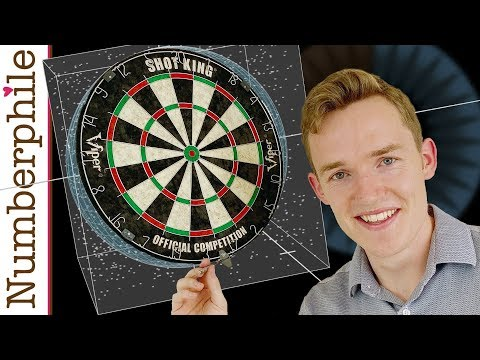

In [6]:
YouTubeVideo(id="6_yU9eJ0NxA", width=600, height=480)

## The Problem

Given the following game rules and a dart thrower who throws darts with a uniform distribution in a unit square, what is the expected score?

  - The player gets one point per dart thrown.
  - The game ends after a dart fails to land within the bulls-eye.
  - The bulls-eye starts out being a unit circle, but on each successive throw is shrunk to having a diameter equal to the length of the chord of the previous throw.

## Solutions

### Approach 1: Simulation

In [ ]:
!conda install -c conda-forge jupyterlab-plotly-extension

In [347]:
from numpy import sqrt, array, percentile
from numpy.random import random, choice
import holoviews as hv
import hvplot.pandas

In [4]:
hv.extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Calculate Chord of Throw

:Overlay
   .Ellipse.I  :Ellipse   [x,y]
   .Path.I     :Path   [x,y]
   .Path.II    :Path   [x,y]
   .Ellipse.II :Ellipse   [x,y]
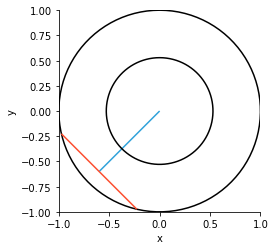

In [428]:
is_inside = lambda x, y, radius=1: sqrt(x**2 + y**2) <= radius
chord_halflen = lambda x, y, radius=1: sqrt(radius**2 - (x**2 + y**2))  if is_inside(x, y, radius) else None
def chord_coords(x, y, radius):
    if not is_inside(x, y, radius):
        raise ValueError("x and y not in radius")
    c = chord_halflen(x=x, y=y, radius=1)
    l = sqrt(x**2 + y**2)

    return array([
        (x - y * (c/l), y - -x * (c/l)),
        (x - -y * (c/l), y - x * (c/l))
    ])


draw_circle = lambda radius=1: hv.Ellipse(x=0, y=0, spec=(radius * 2, radius * 2))
draw_radius = lambda x=0, y=1: hv.Path({'x': [0, x], 'y': [0, y]})

def draw_chord(x, y, radius=1): 
    coords = chord_coords(x, y, radius=radius)
    return hv.Path({'x': coords[:, 0], 'y': coords[:, 1]})

x, y = -.6, -0.6
draw_circle() * draw_radius(x, y) * draw_chord(x, y, 1) * draw_circle(chord_halflen(x, y, 1))

### Simulate Game

In [147]:
random(), random()

(0.8928643682128384, 0.12551418505178902)

In [456]:
def game():
    radius, n_throws = 1, 0
    while radius:
        x, y, = random(size=2)
        chord = chord_halflen(x=x, y=y, radius=radius)
        n_throws += 1
        yield pd.Series([x, y, radius, chord], index=['x', 'y', 'radius', 'distance'], name=n_throws)
        radius = chord
        
pd.DataFrame(game())

,x,y,radius,distance
1,0.097623,0.842222,1.000000,0.530218
2,0.675320,0.634223,0.530218,NaN


:Overlay
   .Ellipse.I  :Ellipse   [x,y]
   .Path.I     :Path   [x,y]
   .Path.II    :Path   [x,y]
   .Ellipse.II :Ellipse   [x,y]
   .Path.III   :Path   [x,y]
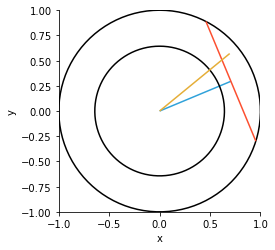

In [457]:
def display_game():
    plots = draw_circle()
    for throw in game():
        plots *= draw_radius(x=throw.x, y=throw.y)
        try:
            plots *= draw_chord(x=throw.x, y=throw.y, radius=throw.radius)
            if throw.distance > 0:
                plots *= draw_circle(radius=throw.distance)
        except ValueError:
            pass
    return plots
#         draw_circle() * draw_radius(x, y) * draw_chord(x, y, 1)

display_game()

In [462]:
n_games = 100000
games = pd.Series([len(list(game())) for el in range(n_games)], name='NumThrows')
games.head()

0    2
1    2
2    2
3    3
4    2
Name: NumThrows, dtype: int64

:Bars   [index]   (NumThrows)
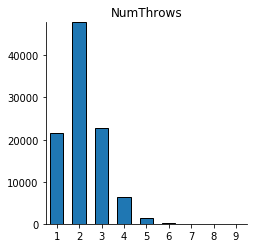

In [463]:
summary = (games).value_counts().sort_index()
summary.hvplot.bar()

### Summary

In [464]:
(summary / summary.sum() * summary.index).sum()

2.1885000000000003

### Get the Expected value of the Game (use Monte-carlo sampling to get error bars)

In [469]:
from numpy import random
from numpy import percentile

In [468]:
boot_ci = 100
boot_means = random.choice(games, size=(len(games), boot_ci)).mean(axis=0)
lower, upper = percentile(boot_means, [2.5, 97.5])
f"The expected number of throws in this game is between {lower:.5} and {upper:.5} throws."

'The expected number of throws in this game is between 2.1833 and 2.1935 throws.'

### And the answer on the video?

$ e^{\pi/4} $

In [467]:
from numpy import e, pi
e ** (pi / 4)

2.1932800507380152

Yay!